# Model Development

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="dark")
import numpy as np
from scipy import stats

In [116]:
df = pd.read_parquet("./data/cleaned_data.parquet")
print(f"data shape: {df.shape}")
df.head()

data shape: (541909, 9)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_spend
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


## Step 1: Remove Defective Data and Ouliers

In [117]:
defect_index = df[(df['Quantity'] < 0) & (df['UnitPrice'] == 0)].index
df = df.drop(index=defect_index)
print(f"datashape: {df.shape}")
df.head()

datashape: (540573, 9)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_spend
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [118]:
df = df.reset_index(drop=True)
print(f"data shape: {df.shape}")
df.head()

data shape: (540573, 9)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_spend
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


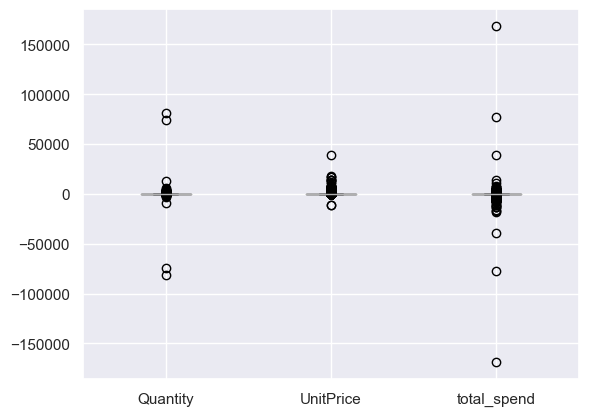

In [119]:
df.drop(columns=['CustomerID']).boxplot()
plt.show()

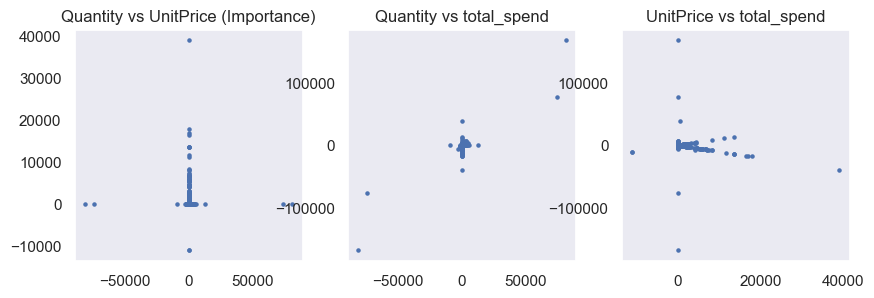

In [120]:
fig, ax = plt.subplots(1, 3, figsize=(10, 3))
ax[0].scatter(x=df['Quantity'], y=df['UnitPrice'], s=5)
ax[0].title.set_text('Quantity vs UnitPrice (Importance)')
ax[1].scatter(x=df['Quantity'], y=df['total_spend'], s=5)
ax[1].title.set_text('Quantity vs total_spend')
ax[2].scatter(x=df['UnitPrice'], y=df['total_spend'], s=5)
ax[2].title.set_text('UnitPrice vs total_spend')
plt.show()

In [121]:
# IQR method for Quantity column
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df['Quantity']>=upper)[0]
lower_array = np.where(df['Quantity']<=lower)[0]

# Removing the outliers
df = df.drop(index=upper_array)
df = df.drop(index=lower_array)

In [122]:
# Z-score method for UnitPrice column
z = np.abs(stats.zscore(df['UnitPrice'])) 
threshold = 3
outliers = np.where(z > threshold)

# DataFrame with no oulier
df = df[(z < threshold)]

In [123]:
print(df.shape)
df.head()

(482515, 9)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_spend
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


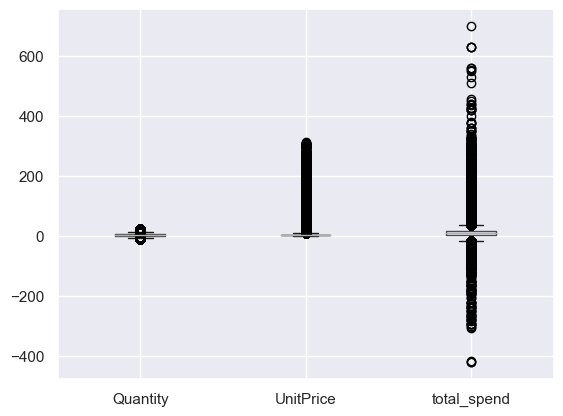

In [124]:
df.drop(columns=['CustomerID']).boxplot()
plt.show()

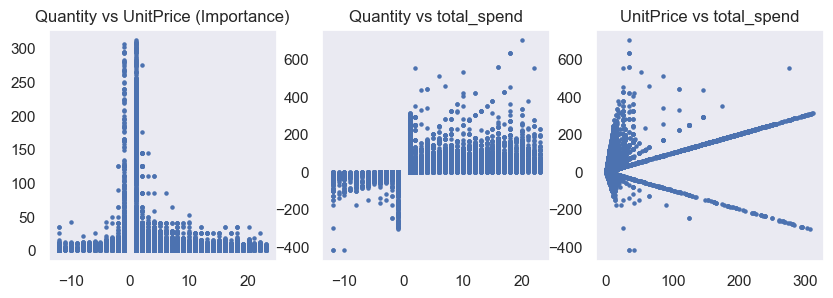

In [125]:
fig, ax = plt.subplots(1, 3, figsize=(10, 3))
ax[0].scatter(x=df['Quantity'], y=df['UnitPrice'], s=5)
ax[0].title.set_text('Quantity vs UnitPrice (Importance)')
ax[1].scatter(x=df['Quantity'], y=df['total_spend'], s=5)
ax[1].title.set_text('Quantity vs total_spend')
ax[2].scatter(x=df['UnitPrice'], y=df['total_spend'], s=5)
ax[2].title.set_text('UnitPrice vs total_spend')
plt.show()

## Step 2: ML

In [239]:
df = df.reset_index(drop=True)
sample = df.copy()
print(df.shape)
df.head()

(482515, 9)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_spend
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [ ]:
# anomaly detection
# customer segmentation by RFM
# market basket analysis
# customer lifetime value
# churn prediction
# demand forecasting

### Anomaly Detection with Isolation Forest

In [96]:
from sklearn.ensemble import IsolationForest
X = sample[['Quantity', 'UnitPrice', 'total_spend']]
if_detector = IsolationForest(n_estimators=100, contamination=0.0001).fit(X)
if_detect = if_detector.predict(X)

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [97]:
if_detect.shape
print(if_detect.sum())

482513


In [98]:
color_map = {1: 'royalblue', -1: 'crimson'}

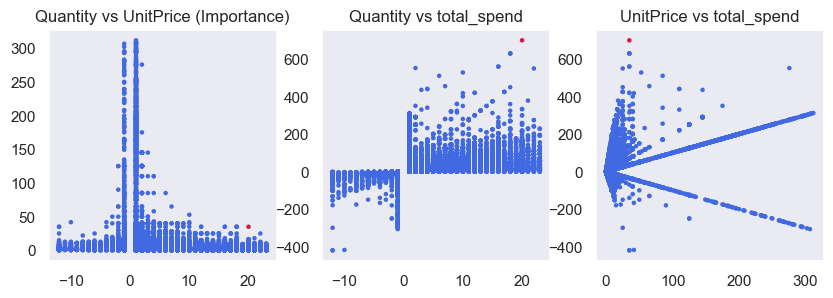

In [99]:
fig, ax = plt.subplots(1, 3, figsize=(10, 3))
ax[0].scatter(x=df['Quantity'], y=df['UnitPrice'], s=5, c=pd.Series(if_detect).map(color_map))
ax[0].title.set_text('Quantity vs UnitPrice (Importance)')
ax[1].scatter(x=df['Quantity'], y=df['total_spend'], s=5, c=pd.Series(if_detect).map(color_map))
ax[1].title.set_text('Quantity vs total_spend')
ax[2].scatter(x=df['UnitPrice'], y=df['total_spend'], s=5, c=pd.Series(if_detect).map(color_map))
ax[2].title.set_text('UnitPrice vs total_spend')
plt.show()

In [113]:
df.iloc[np.where(if_detect == -1)[0], :]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_spend
87095,543650,84078A,SET/4 WHITE RETRO STORAGE CUBES,20,2011-02-11 09:17:00,34.95,12980,United Kingdom,699.0


In [115]:
df[df['CustomerID'] == 12980]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_spend
32716,539144,84078A,SET/4 WHITE RETRO STORAGE CUBES,16,2010-12-16 11:36:00,34.95,12980,United Kingdom,559.20
54207,540908,84078A,SET/4 WHITE RETRO STORAGE CUBES,16,2011-01-12 11:53:00,34.95,12980,United Kingdom,559.20
87095,543650,84078A,SET/4 WHITE RETRO STORAGE CUBES,20,2011-02-11 09:17:00,34.95,12980,United Kingdom,699.00
98745,544689,84078A,SET/4 WHITE RETRO STORAGE CUBES,6,2011-02-23 08:46:00,34.95,12980,United Kingdom,209.70
188434,553102,84078A,SET/4 WHITE RETRO STORAGE CUBES,18,2011-05-13 11:58:00,34.95,12980,United Kingdom,629.10
212282,555513,84078A,SET/4 WHITE RETRO STORAGE CUBES,18,2011-06-05 10:38:00,34.95,12980,United Kingdom,629.10
221084,C556277,82001S,VINYL RECORD FRAME SILVER,-1,2011-06-09 19:52:00,3.39,12980,United Kingdom,-3.39
221085,C556277,84078A,SET/4 WHITE RETRO STORAGE CUBES,-2,2011-06-09 19:52:00,34.95,12980,United Kingdom,-69.90
253196,C559252,84078A,SET/4 WHITE RETRO STORAGE CUBES,-4,2011-07-07 11:42:00,34.95,12980,United Kingdom,-139.80


### Customer Segmentation by RFM

- R: Recency - diff date of the most recent purchase for each customer
- F: Frequency - total number of purchases for each customer
- M: Monetary - total money spent by each customer
- etc. should be included

In [313]:
sample = df.copy()
anonymous_customer_index = sample[sample['CustomerID'] == 0].index
sample = sample.drop(index=anonymous_customer_index)
sample.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_spend
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [314]:
freq = sample.groupby(['CustomerID'])['InvoiceNo'].nunique().reset_index().rename({'InvoiceNo': 'frequency'}, axis=1)
# sample[sample['CustomerID'] == 12349].groupby("CustomerID")['InvoiceNo'].value_counts()
freq.head()

,CustomerID,frequency
0,12347,7
1,12348,4
2,12349,1
3,12350,1
4,12352,10


In [315]:
monetary = sample.groupby('CustomerID')["total_spend"].sum().reset_index().rename({'total_spend': 'monetary'}, axis=1)
monetary.head()

,CustomerID,monetary
0,12347,3097.82
1,12348,377.00
2,12349,1626.15
3,12350,314.00
4,12352,1545.41


commented lines are used for testing and inspecting the processes

In [430]:
# sample[['CustomerID', 'InvoiceNo', 'InvoiceDate']].drop_duplicates('InvoiceNo').loc[sample['CustomerID'] == 18283]
# sample.loc[sample['CustomerID'] == 18283].groupby('CustomerID')['InvoiceNo'].value_counts()
# sample.groupby('CustomerID')['InvoiceNo'].nunique()

# unique_invoice = unique invoice both No. and Date
unique_invoice = sample[['CustomerID', 'InvoiceNo', 'InvoiceDate']].drop_duplicates(['InvoiceNo'])
unique_invoice['recency'] = unique_invoice.groupby('CustomerID')['InvoiceDate'].diff().dt.days
# unique_invoice
# unique_invoice.loc[unique_invoice['CustomerID'] == 15804]
# unique_invoice.loc[unique_invoice['CustomerID'] == 17850]

# latest_index = unique_invoice.groupby(['CustomerID'])['InvoiceDate'].max().index
# unique_invoice.iloc[latest_index, :]
# recency = unique_invoice.iloc[latest_index, :][['CustomerID', 'recency']]
recency = unique_invoice.drop_duplicates("CustomerID", keep='last')
# NaN occured for one time purchase
# sample.loc[sample['CustomerID'] == 17301]['InvoiceDate'].nunique()
pd.options.mode.chained_assignment = None  # default='warn'
recency['recency'] = recency['recency'].fillna(999)
recency['recency'] = recency['recency'].astype(int)
recency = recency.drop(columns=['InvoiceNo', 'InvoiceDate'])
recency.head()

,CustomerID,recency
125,18074,999
185,13747,999
300,12791,999
380,17908,999
580,16583,999


In [431]:
customer_profile = pd.merge(freq, monetary, how='left', on='CustomerID')
customer_profile = pd.merge(customer_profile, recency, how='left', on='CustomerID')
customer_profile.head()

,CustomerID,frequency,monetary,recency
0,12347,7,3097.82,37
1,12348,4,377.00,173
2,12349,1,1626.15,999
3,12350,1,314.00,999
4,12352,10,1545.41,35


### Market Basket Analysis